# Evaluation Metric

### Loss와 Metric의 차이

RMSE(Root Mean Suqre Error)라는 개념은 Loss 함수로도 사용되기도 하고, 회귀 모델의 Metric으로 사용되기도 한다. 단순히 수식의 차이로 설명할 수는 없다. 오히려 두 개념은 사용되는 시점과 용도가 다르다.

Loss : 모델 학습시 학습데이터(train data)를 바탕으로 계산되어, 모델의 파라미터 업데이트에 활용되는 함수

Metric : 모델 학습 종료 후 테스트데이터(test data)를 바탕으로 계산되어, 헉습된 모델의 성능을 평가하는 데 활용되는 함수

MNIST 손글씨 분류 모델을 생각해보자. 모델의 Loss함수로는 Cross Entropy Loss였다. 하지만, 모델을 평가하는 Metric은 Accuracy였다. 왜 굳이 Loss와 Metric을 다르게 적용했을까? 만약 학습데이터 배치에 대해 모델이 계산한 train accuracy를 Loss로 삼아서 학습을 진행하면 안 될까?

분류 모델의 성능을 평가하는 데는 Accuracy가 더 우월한 Metric이다. 궁극적으로 우리가 원하는 모델은 테스트 데이터에 대한 Accurcy가 높은 모델이지, Cross Entropy가 얼마나 낮아졌는 지가 우리의 궁극적은 관심이 아니다. 하지만, 모델의 정확성을 향상시켜 궁극적으로 Accuracy가 높은 모델을 만들기 위해 활용하는 Loss로는 Cross Entropy가 더욱 정당한 것이다.

하지만 회귀모델일 경우 RMSE가 Loss와 Metric 양쪽으로 효과적으로 사용될 수도 있다. 즉, Loss나 Metric으로 어떤 함수를 활용할지는 해결해야 할 Task에 따라 다르다. 하지만 우리가 해결해야 할 문제에 어떤 Loss나 Metric이 적당한지를 판단하는 직관력이 중요하다.

# Confusion Matrix와 Precision/Recall

분류 모델로 되돌아 가보자. 하지만 우리는 분류 모델에서 Accuracy가 항상 좋은 Metric이 되지 않을 수 있다는 것을 알 수 있다. 분류 모델 측면에서ㅓ 모델의 결과가 이진 분류되는 형태일 때, 모델의 예측 결과와 실제 정답셋을 비교하여 아래의 표처럼 4가지 항목으로 표현하는 Confusion Matrix을 떠올려 보자.

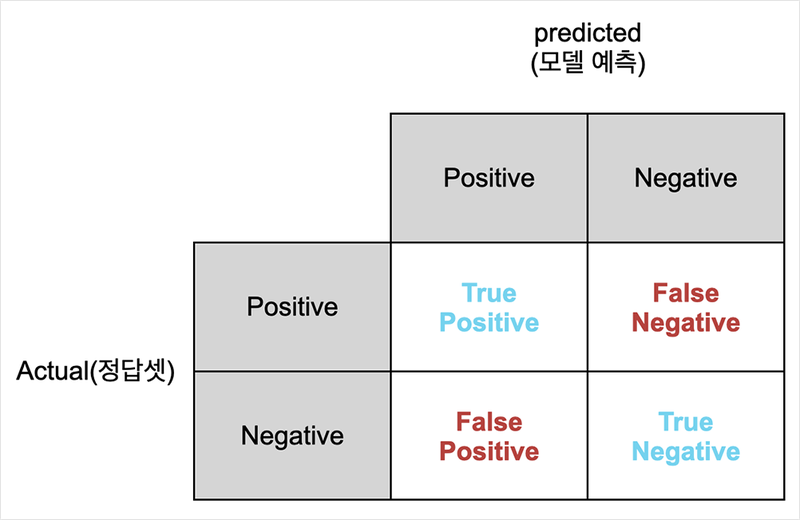

True Positive (TP) : 모델이 양성(positive)을 양성으로 맞췄을 때

True Negative (TN) : 모델이 음성(Negative)을 음성으로 맞혔을 때

False Positive (FP) : 모델이 음성(Negative)을 양성(Positive)으로 잘못 예측했을 때

False Negative (FN) : 모델이 양성(Positive)을 음성(Negative)으로 잘못 예측했을 때

그러면 분류 모델 측면에서 우리가 아는 정확도(Accuracy)는 전체 표본 중 정확히 분류된 표본의 수라고 볼 수 있다. 즉, 이진 분류일 때 정확도를 아래의 식으로 표현할 수 있다.

정확도 = 정답을 맞힌 예측의 수 / 전체 문제의 수

= TP + TN/ TP + TN + FP + FN

예를 들어,

병원에 내원한 환자가 암인지 아닌지 구분하는 예측모델을 만드는 경우를 생각해보자. 100명의 환자에 대한 예측에 대해 다음과 같은 결과를 얻었다.

TP(실제로 암이면서, 암으로 예측한 결과) = 1

TN(실제로 정상이고, 정상으로 예측한 결과) = 90

FN(실제로 암이지만, 정상으로 예측한 결과) = 8

FP(실제로 정상이지만, 암으로 예측한 결과) = 1

정확도는 91%

### Precision과 Recall

Precision은 정밀도, Recall은 재현율

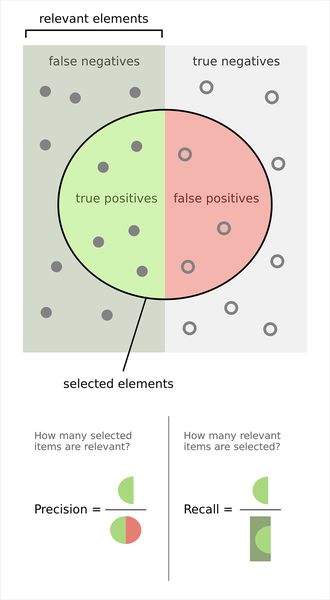

정밀도(Precision) = TP/ TP + FP

이 개념은 모델이 양성으로 규정한 것이 얼마나 정확한지를 알 수 있다. 모댈이 음성으로 규정하는 것에 대해서는 크게 관심이 없다. 정밀도가 높다는 것은 FP가 낮다는 것이다. 즉 모델이 양성으로 잘못 규정한 것이 적을 수록 정밀도는 올라간다.

재현율(Recall) = TP / TP + FN

이 개념은 실제로 양성의 것들이 얼마나 모델에 의해 정확하게 탐지되었나를 보는 것이다. 실제로 음성인 것을 양성으로 잘못 규정한 것에 대해서는 관심이 없다. 재현율이 높다는 것은 FN이 낮다는 것이다. 즉 모델이 실제 양성을 분류해 내지 못한 경우가 적을 수록 재현율은 올라간다.

정확도가 높아도 재현율이 낮으면 아주 쓸모 없는 모델이다. 예를들어, 정확도가 91인데, 재현율이 11이면 형편 없다.

그럼 이렇게 쓸모없는 모델의 정확도가 높게 나온 이유는 뭘까? Confusion Matrix에서 보자. 100개의 데이터 중 대부분 4가지 카테고리 중 TN에 몰려 있고, 이 모델은 TN을 아주 정확하게 분류했기 때문에 정확도가 높게 나온 것이다.

여기서 결론

음성 대 양성 데이터 분포가 불균형할 경우 정확도는 모델을 평가하는 데 좋은 척도가 되지 못한다. 그렇다면 이런 불균형 데이터가 주어진 상황에서 분류 모델을 어떻게 평가하면 좋을까?

### F-sscore

Precision과 Recall은 단독으로 평가 척도로 사용하기에 부족한 면이 있다.

예를 들어, Precision이 좋은 척도가 될만 한 스팸메일 분류기 모델을 생각해 봅시다. 이 경우에 FN은 다소 허용할만 합니다. 스팸이 잘못 걸러져 메일함이 들어오긴 했지만 FP가 발생할 경우에는 꼭 필요한 비지니스 메일이 스팸함에 버려 엄청난 손실이 발생하게 될지도 모릅니다. 그래서 FP를 줄이려면 애매한 메일을 음성으로 판단하는 게 좋은데, 그렇다고 해서 FN을 무한히 허용하면 스팸 메일 분류기 자체가 쓸모없어지는 상황이 될 수 있어 좋지 않습니다.

Recall이 좋은 척도가 될만한 사례는 위의 암환자 예측 모델이 적당할 것 같습니다. 암 의심환자를 음성으로 분류했다가 환자의 생명을 위험에 빠뜨리게 되면 안되므로, FN을 최소화하는 Recall이 좋은 척도가 될 수 있을지도 모릅니다. 하지만 여기는 함정이 있습니다. Recall을 최대화하는 방법은 간단합니다. 모든 환자를 양성으로 진단해 버리면 됩니다. 적어도 FN이 발생하게 되지는 않으니 Recall은 무조건 1이 됩니다. 그러나 이런 예측모델 또한 쓸모가 없긴 마찬가지입니다.

Fb = (1 + b**2) * precision*recall /(b**2*precision) + recall

### THRESHOLD의 변화에 따른 모델 성능

기준선(Threshold)를 넘어가면 우리는 양성으로 분류. 그런데 우리가 학습시킨 모델은 Recall이 높을 수록 좋은 모델이라고 가정해보자.

양성일 확률이 0.5가 넘으면 양성이라고 분류하는 것보다는 양성일 확률이 0.3만 넘으면 양성이라고 분류해보자. 모델의 파라미터 등은 전혀 변한 것이 없는데, 모델의 출력값을 해석하는 방식만 다르게 해도 이 모델은 전혀 다른 성능을 가지게 된다. 따라서 이 모델의 성능척도 값도 달라지게 된다.

이것은, 모델의 성능이라는 것이 F1 score같은 숫자 하나로만 규정될 수 있는 게 아니라는 것을 의미한다. (물론 모델 출력의 해석 방식이 고정적으로 주어진다면 F1 score는 유효한 Metric이 된다) 이렇게 Threshold가 달라지는 것을 고려하여 전체적인 모델의 성능을 평가하는 방법으로 PR(Precision and Recall) 커브와 ROC(Receiver Opearating Characteristic) 커브를 그려보는 두가지 방법이 있다.

Threshold의 변화에 따라 모델 성능이 달라지는 상황을 간단한 분류 모델 예제를 통해 살펴 본다.

### 실습에 사용할 데이터 준비

In [2]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.

(150, 4)


### Task의 재구성

붓꽃 분류 예제는 상당히 간단하기 때문에, 그대로 훈련시키면 거의 100%에 가까운 성능을 낸다.

그래서 일부로 데이터 잡음(noise)을 추가해 성능을 낮추어 보겠다. 랜덤한 갑으로 이루어진 200 * n_features, 즉 800개의 컬럼을 매 데이터마다 추가한다.

In [3]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었다.

(150, 804)


원래 붓꽃의 데이터는 총 3가지 라벨로 나뉜다.
하지만, 분석을 간단히 하기 위해 여기서는 양성/음성으로 나뉘는 이진 분류(binary classificationn)문제로 줄여, 2개의 라벨 간 분류만 해보겠다.

In [4]:
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한한다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


# 모델 학습


2개의 라벨로 나뉜 데이터를 가지고, SVM(Support Vector Machine)으로 모델을 구성하여 학습시킨 후 test 데이터를 넣어 정확도를 확인해보도록 하겠다.

In [5]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state) # poly 3차원
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

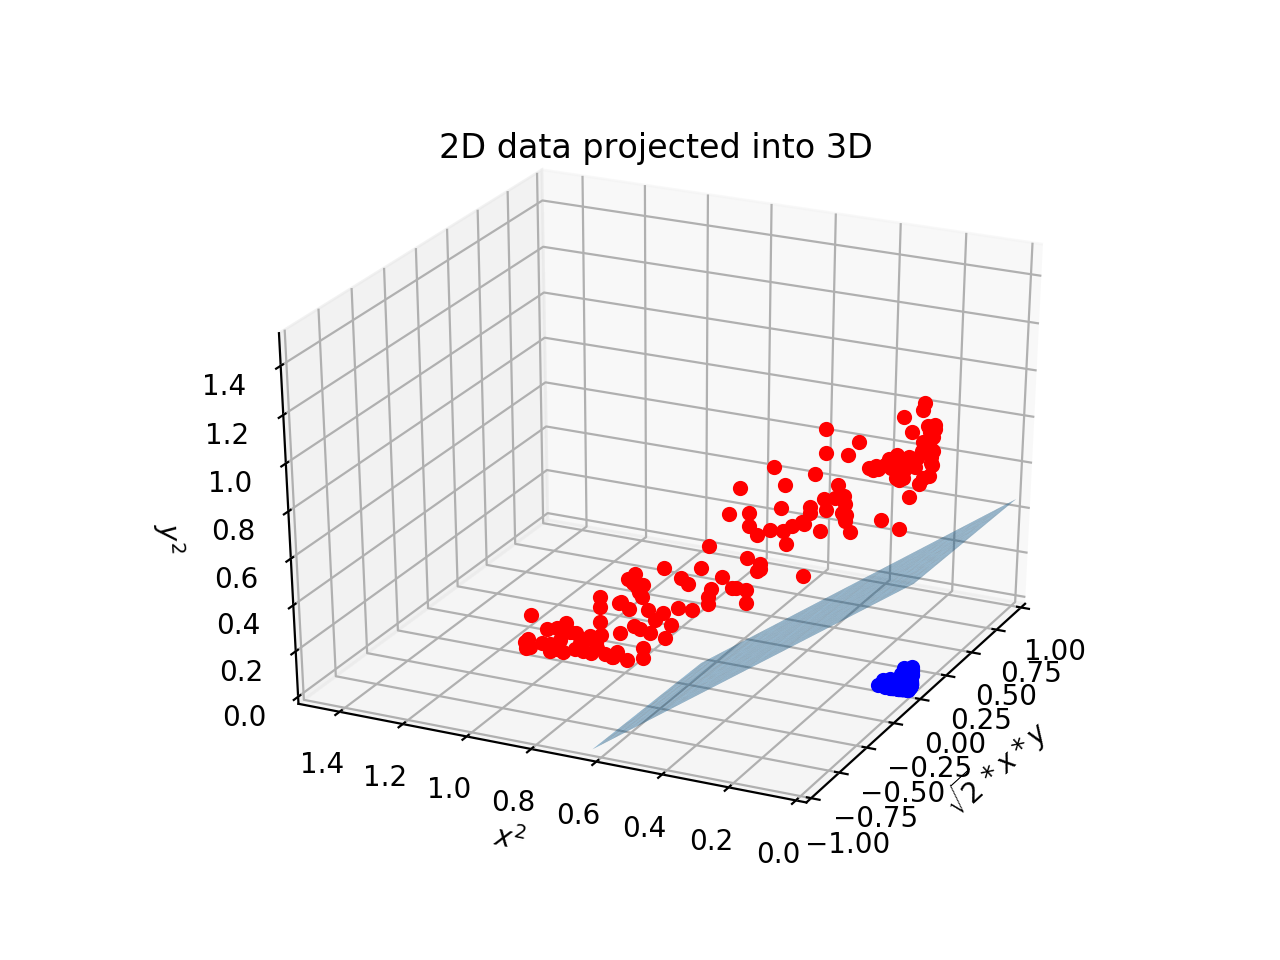

classifier.score() 함수는 테스트 데이터에 대한 평균 정확도 (Accuracy)를 리턴한다. 0.5에 가까운 수준의 binary  classifier라니, 전혀 분류 성능이 없다고 볼 수 있다. 이번에는 SVM의 커널을 바꾸어 보겠다.

In [6]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

80% 정도의 정확도가 나왔다.

In [7]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [8]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

classifier.predict() 리턴값과 y_test를 비교해 보았습니다. 모델 뒤에 Softmax가 있어서 확률값을 출력하는 Logistic Regression 모델과는 달리, SVM에서 별도로 제공하는 decision_function() 함수가 존재합니다. 이 함수값은 (-1, 1) 범위값을 가지는데, 0보다 작으면 음성(label=0), 0보다 크면 양성(label=1)으로 분류하게 된다.

In [9]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


그럼 여기서 confusion_matrix를 계산해 보겠습니다. 실제 정답값 y_test와 y_pred를 비교해 보면 다음과 같은 결과가 얻어진다. confusion_matrix는 [[TP, FN], [FP, TN]]의 형태로 출력된다. 사이킷런에서는 classification_report이라는 함수를 통해 confusion_matrix에서 얻어진 TP, FN, FP, TN 값을 토대로 Precision, Recall, F1-score 등의 평가척도값을 계산해 준다.

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



방금 우리는 decision_function 값이 0보다 큰 것을 양성으로 분류했다. 만약 양성 분류 기준을 좀더 확대해서 -0.1보다 큰 것을 양성으로 분류한다면 어떻게 될까?

In [11]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



양성 분류 기준을 확대했기 때문에, Recall이 0.77에서 0.81로 상승했다. 하지만 전체적인 F1-score는 0.80에서 0.79로 소폭 하락했다. 하지만 태스크의 특성에 따라서는 이것이 오히려 더 좋은 결과를 가져올지도 모르겠다.

Threshold 값을 조금씩 바꿔보면서 평가척도값이 어떻게 변하는지 확인해 보자.

In [12]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [13]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [14]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



### Precision-Recall 커브

PR(precision-Recall) 커브는 Recall을 X축, Precision을 Y축에 놓고 Threshold변화에 따른 두 값의 변화를 그래프로 그린 거다.

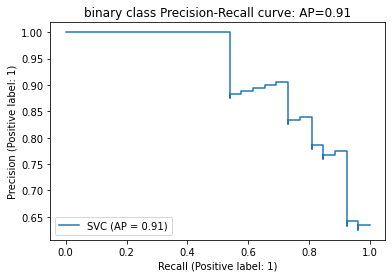

In [15]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

위 그림을 보면 Precision과 Recall 사이의 트레이드오프 관계를 확인할 수 있다. Threshold값에 따라 우리가 얻게 되는 Precision, Recall 값은 저 그래프상의 어딘가가 될 것이다. 물론 우리가 원하는 값은 Precision이든 Recall이든 모두 1에 가깝기를 원합니다. 이상적으로는 그래프가 (1, 1)에 찍히면 좋겠습니다만, 가급적 위 그래프가 (1, 1)에 근접하도록 그려지길 바란다.

그래서 Threshold 값에 무관하게 모델의 전체적인 성능을 평가하는 방법으로, 위 PR 커브 아래쪽 면적을 계산하는 방법이 있다. 이것을 AUC(Area Under Curve) 값이라고 한다. PR AUC를 계산하는 방법으로 다음과 같이 사이킷런에서 제공하는 average_precision_score 함수를 사용한다.

위 수식의 특성을 살펴보면, average_precision_score(AP) 값은, n 값을 무한히 크게 한다면 아주 작은 Recall 구간에 대해 Pn 값을 적분하는 것과 같게 된다. 그러므로 PR 커브의 아래쪽 면적인 PR AUC와 같은 의미가 된다. 하지만 사이킷런 문서에서는 average_precision_score와 PR AUC가 구현 측면에서 약간 다르다고 설명하고 있다. 두 개념이 의미적으로 비슷하게 사용될 수 있다고만 이해하면 될 것 같다.

In [16]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


average_precision_score 값은 최대 1이 될 수 있을 것입니다. 위에서는 0.91이 나왔군요. 그렇다면 모델을 바꿔 보면 이 값이 어떻게 달라질지 궁금해집니다. 우리는 이전 스텝에서 SVM의 커널을 'poly'로 주었을 때 Accuracy가 매우 낮았던 것을 기억합니다. 이때의 average_precision_score 값이 어떻게 될지 직접 구현해서 확인해 보자.

In [17]:
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

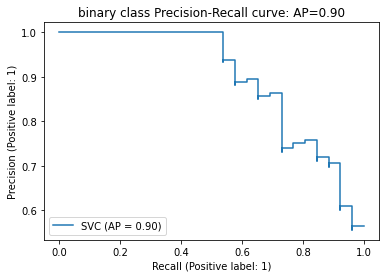

In [18]:
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### ROC 커브

ROC(Receiver Operating Characteristic Curve) 는 수신자 조작 특성 곡선이라는 단어로 표현할 수 있다.
ROC는 앞서 계산해보았던 Confusion Matrix 수치를 활용해, 분류기의 분류 능력을 그래프로 표현하는 방법이다. 물론 이 그래프도 PR 커브와 마찬가지로 분류기의 Threshold 값의 변화에 따라 Confusion Matrix에 생기는 변화로 인해 그려지는 것이다.

#### ROC 예시 곡선

ROC를 그리는 축인 TP Rate과 FP Rate은 Precision, Recall과 비슷해 보이지만 조금 다른 개념이다.

TP Rate과 FP Rate은 다음과 같이 계산합니다

TPR(Sensitivvity) = TP/ TP + FN

FPR(1 - Specificity) = FP / TN + FP

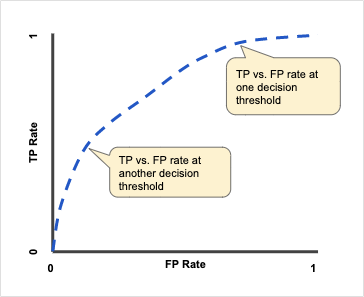

위 그림은 ROC 그래프의 예시이며, 점선이 ROC입니다.

TP Rate(TPR)의 수식을 잘 보면 실은 우리가 잘 아는 Recall과 같은 것이다. FP Rate는 1 - Specificity라고 소개되어 있는 데, Specificity라는 것은 TN / TN + FP이 되므로, 실은 음성 샘플에 대한 Recall이라고 볼 수 있다.

### AUC 예시 영역

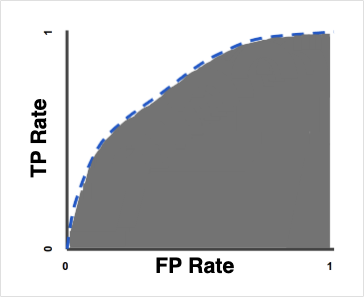

위 그림은 ROC AUC(Area Under the ROC Curve)를 보여주는 회색 영역으로, 저 영역의 넓이가 넓은 모델일 수록, 상대적으로 좋은 성능을 보여준다고 한다. 하지만 PR 커브만큼 직관적으로 와닿지 않아서, 왜 그런 것인지 얼른 와닿지 않습니다. 그렇다면 일단 한 번 그려 보자. 사이킷런에는 roc_curve, auc라는 함수를 통해 ROC를 그리거나 ROC AUC를 쉽게 구해볼 수 있다.

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("🌜    .\n·   *\n  *   *\n🌲 🐕 🌳")

🌜    .
·   *
  *   *
🌲 🐕 🌳


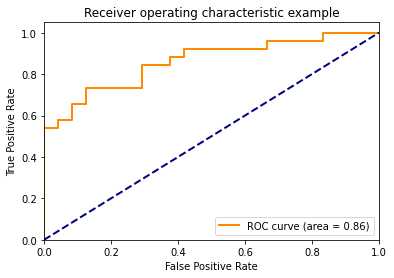

auc result:0.8605769230769231


In [20]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

아주 이상적으로 Precision과 Recall이 전부 1이 되는 완벽한 모델이라면 ROC 커브에서는 어디에 점이 찍힐까? 네, 바로 (0,1)일 것이다. 양성과 음성에 대한 Recall이 모두 1이 될테니 TPR은 1, FPR은 0이 될 것이다.

몇가지 극단적인 경우를 생각해 봅시다. 모델이 모든 샘플에 대해 양성이라고 분류한다면 어떨까요? 이땐 이 분류기가 (1,1)에 찍힐 것이다. 반대로 모든 샘플에 대해 음성이라고 분류한다면 이 분류기는 (0,0)에 찍힐 것이다. 이번에 완벽한 랜덤 분류기를 가정해 보자. 이 분류기는 양성이든 음성이든 무관하게 p의 확률로 양상이라고 분류할 것이다. 이 랜덤 분류기의 Recall은 p가 될 것이다. 음성에 대한 Recall도 p가 될테니 이 분류기는 (p, 1-p)에 찍힌다.

위 그래프에서 (0,0)과 (1,1)을 잇는 파란 점선은 바로 위와 같은 극단적인 경우들만 모아놓은 경우다. 그래서 의미있는 분류기라면 적어도 이 파란 점선보다는 위쪽에 그려져야 하며, 가급적 (0,1)에 가깝게 그려질 수록 우수한 분류기가 된다. 그러므로 ROC AUC가 클수록 상대적으로 좋은 성능의 모델이라고 할 수 있다.

ROC AUC 값도 최대 1이 될 수 있을 것이다. 위에서는 0.89 정도가 나왔다. 이번에도 SVM 커널의 종류를 바꿔 가며 ROC커브를 그리고 ROC AUC 값을 구해보자.



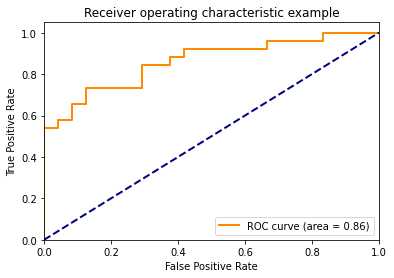

auc result:0.8605769230769231


In [21]:
classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")


### 다양한 머신러닝 모델의 평가척도

지금까지 우리는 분류 모델의 평가척도에 대해 알아보았다. 분류 문제에 있어 문제의 성격, 분류 기준 등 다양한 변수에 따라 정확한 모델 평가 척도는 달라질 수 있어 다소 복잡했다. 하지만 머신러닝에는 분류만 있는 것이 아니라, 회귀, 추천, 군집 등 다양한 모델이 있다. 음성, 이미지, 텍스트 등의 생성형 모델들이 가지는 독특한 평가 척도들도 매우 다양하다.

#### 회귀 모델의 평가척도

회귀 모델은 분류 모델에 비해 평가척도를 다루는 것이 간단하다. loss 함수가 테스트셋에 적용될 때 그대로 Metric이 되는 경우가 대부분이다. 그래서 회귀 모델의 경우에는 어떤 loss가 적합한지 그 특성을 알아보는 것이 중요하다.

MSE, RMSE 등 square 계열 Metric과 MAE, MAPE 등 absolute value 계열 Metric이 특이값에 대해 어떤 차이를 보이는가?

MSE, RMSE는 오차의 제곱에 비례하여 수치가 늘어나므로, 특이값에 민감하게 반응하여, Outlier가 많은 데이터에 대해 모델이 강건(robust)하지 못한다.

MAE, MAPE는 오차의 절대값에 비례해서 수치가 늘어나는데 상대적으로 특이값에 민감하지 않고 Outlier가 많은 데이터에 대해 강건하다.

#### 랭킹 모델의 평가척도

추천시스템은 넓게 보면 정보 검색(Information Retrieval)과 같은 로직을 가지고 있다. 이런 모델들이 일반적인 분류모델과 다른 점은, 랭킹(우선순위) 개념이 추가 된다는 점이다. User를 입력으로 했을 때, Item들이 추천할만한지 여부를 분류만 하는 것이 아니라, 얼마나 추천할만 한지 랭킹까지 매겨야 한다는 점이다.

NDCGrk MRR, MAP 등 이전 평가척도들에 비해 어떤 부분에서 좋아졌다고 할 수 있는가?

랭킹을 매기기 위해 임의성을 배제하고 모든 콘텐츠 아이템에 대한 관련성을 계산하여 랭킹에 반영한다.

#### 이미지 생성 모델의 평가척도

모델을 평가한다는 것은 결국 정답과 모델의 예측치 사이의 거리를 측정하는 방식이다. 그런데 이미지 생성 모델에서 원본 이미지와 새로운 이미지 사이의 거리를 어떻게 측정할 수 있을까?

MSE나 PSNR 대비 SSIM이 가지는 가장 큰 차이점은 무엇인가 ?

MSE나 PSNR은 모두 픽셀 단위로 비교해서 거리를 측정한다. 그러나 이 방식은 이미지가 약간 평행이동해 있어도 두 차이를 크게 측정하는 단점이 잇다. SSIM은 이와 달리 픽셀 단위 비교 보다는 이미지 내의 구조적 차이에 집중하는 방식을 쓴다.

#### 기계번역 모델의 평가척도

이미지 생성모델에서 원본과 생성본을 비교하여 거리를 잰다는 것은 까다롭긴 하지만 RGB 공간 등 두 이미지 사이의 거리를 측정할 수 있는 개념적 공간이 존재한다. 그러나 텍스트라면 어떨까? 텍스트 생성 모델 중 가장 대중적인 것은 기계번역 모델이다. 영어를 한국어로 번역한 문장이 정답 한국어와 얼마나 비슷한지를 어떻게 측정하면 좋을까?

BLEU score는 결국 두 텍스트가 얼마나 겹치는지를 측정하는 척도이다. BLEU에서는 텍스트가 겹치는 정도를 어떻게 측정하는가?

1-gram, 2-gram, 3-gram, 4-gram이 두 문장 사이에 몇번이나 공통되게 출현하는지를 측정한다.